## Affect labeling


In [1]:
import pandas as pd
import numpy as np

In [2]:
lyrics = pd.read_csv('../lyrics_5kk.csv')

In [81]:
# count = lyrics['predicted topics'].value_counts()['family and religion']
# print(count, " family and religion")

count = lyrics['predicted_topics'].value_counts()['family and religion']
print(count, " family and religion")
count = lyrics['predicted_topics'].value_counts()['love and relationship']
print(count, " love and relationship")
count = lyrics['predicted_topics'].value_counts()['violence']
print(count, " violence")
count = lyrics['predicted_topics'].value_counts()['life and time']
print(count, " life and time")
count = lyrics['predicted_topics'].value_counts()['wealth and authority']
print(count, " wealth and authority")
# count = lyrics['predicted topics'].value_counts()['home and nature']
# print(count, " home and nature")
count = lyrics['predicted_topics'].value_counts()['home and nature']
print(count, " home and nature")


317400  family and religion
44031  love and relationship
2357268  violence
40937  life and time
1131420  wealth and authority
1443022  home and nature


In [3]:
lyrics

,Unnamed: 0,artist,title,tag,year,views,part,lyrics,explicitness,predicted_topics,schemes,Valence,Arousal,Dominance,topic
0,0,JAY-Z,Can I Live,rap,1996,468624,[Verse 1],While I'm watchin' every nigga watchin' me clo...,Explicit content,wealth and authority,0-0-0-0-1-1-0-2-0-3-4-5-0-6-7-8-7-9-7-5-5-10-1...,Medium,Medium,Medium,general
1,1,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Ge-ge-geyeahhh\nCan I live?\nCan I live?,Normal,violence,0-1-2,High,High,High,life and relationships
2,2,JAY-Z,Can I Live,rap,1996,468624,[Verse 2],My mind is infested with sick thoughts that ci...,Normal,wealth and authority,0-1-1-1-2-3-4-5-5-6-6-1-1-1-7-7-8,Medium,Medium,High,general
3,3,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Can I live?\nCan I live?\nCan I live?\nCan I l...,Normal,violence,0-1-2-3,High,High,High,life and relationships
4,4,Fabolous,Forgive Me Father,rap,2003,4743,[Hook],Forgive me father for I have sinned\nBut look ...,Explicit content,violence,0-0-0-0-1-0-0-0,High,Medium,High,life and relationships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285446,5285446,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,violence,0-1-0-2-3,Medium,Low,Low,money and authority
5285447,5285447,Alana Springsteen,New Number,country,2022,1,[Verse 2],You need a new number and you can't get it fas...,Normal,home and nature,0-0-1-2,High,Medium,Medium,money and authority
5285448,5285448,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,violence,0-1-0-2-3-2-4-5,Medium,Low,Low,money and authority
5285449,5285449,Alana Springsteen,New Number,country,2022,1,[Bridge],"Oh, if you wanna help me out\nIf you wanna let...",Normal,home and nature,0-1-2-3-3-2,Low,Low,Low,money and authority


In [4]:
import numpy as np
# Specify the file path and name
file_path = 'NRC-VAD-Lexicon.txt'

# Create an empty dictionary to store the word-phoneme mappings
affect_dictionary = {}

encodings = ['utf-8', 'latin-1', 'utf-16', 'cp1252']
for encoding in encodings:
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line:
                    #print(line)
                    split = line.split()
                    if len(split) == 4:
                        affect_dictionary[split[0]] = np.array([float(split[1]), float(split[2]), float(split[3])])
                    elif len(split) == 5:
                        affect_dictionary[split[0]+" "+split[1]] = np.array([float(split[2]), float(split[3]), float(split[4])])
                    else:
                        affect_dictionary[split[0]+ " "+split[1]+ " "+split[2]] = np.array([float(split[3]), float(split[4]), float(split[5])])
            # break
    except UnicodeDecodeError:
        print('Error')


In [5]:
import numpy as np
import re
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pattern = re.compile(r"(\[\s*(Verse|Hook|Bridge|Chorus|Pre-Chorus|Intro|Outro|Refrain|Pre-Hook|Pre Hook|Pre Chorus|pre-Chorus|Interlude).*\]\n|\(\((Verse|Hook|Bridge|Chorus|Pre-Chorus|Intro|Outro|Refrain|Pre-Hook|Pre Hook|Pre Chorus|pre-Chorus|Interlude).*\)\)\n|\((Verse|Hook|Bridge|Chorus|Pre-Chorus|Intro|Outro|Refrain|Pre-Hook|Pre Hook|Pre Chorus|pre-Chorus|Interlude).*\)\n|(VERSE|HOOK|BRIDGE|CHORUS|PRE-CHORUS|INTRO|OUTRO|REFRAIN|PRE-HOOK|PRE HOOK|PRE CHORUS|INTERLUDE).*\n)", re.IGNORECASE)
pattern_special_chars = re.compile(r'[^A-Za-z0-9\s]')

def compute_affect(lyric):    
    lyric = re.sub(pattern, '', lyric) # remove the chorus, bridge and other stuff
    lyric = re.sub(pattern_special_chars, '', lyric) # remove special chars
    lyric = lyric.lower() 
    lyric = lyric.split('\n') # split by new lines
    lyric = list(filter(lambda line: line != '', lyric)) # delete an empty line
    majority_score = np.zeros(3) # the output vector
    count_of_words = 0
    for i, line in enumerate(lyric):
        line = line.split()
        for word in line:
            lemmatized_word = lemmatizer.lemmatize(word) #lemmatize the word
            if word in affect_dictionary:
                majority_score += affect_dictionary[word]
                count_of_words += 1
            elif lemmatized_word in affect_dictionary:
                majority_score += affect_dictionary[lemmatized_word]
                count_of_words += 1
                
                
    # print(count_of_words)
    return majority_score / count_of_words


In [6]:
print(affect_dictionary.get('royalty'))

[0.664 0.142 0.666]


In [7]:
from tqdm import tqdm

tqdm.pandas()

lyrics['affect majority score'] = lyrics['lyrics'].progress_apply(compute_affect)

100%|██████████| 5285451/5285451 [30:04<00:00, 2928.92it/s] 


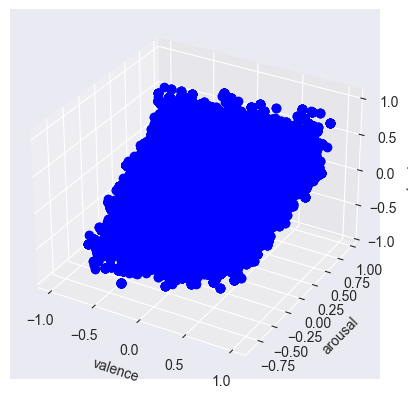

In [8]:
import matplotlib.pyplot as plt
import numpy as np

vectors = lyrics['affect majority score'].values

# Preprocess the vectors and convert to a valid NumPy array
processed_vectors = []
for vector in vectors:
    # Check if the vector is a valid three-dimensional array
    if isinstance(vector, np.ndarray) and vector.shape == (3,):
        processed_vectors.append(vector)

# Convert the processed vectors to a NumPy array
vectors_array = np.array(processed_vectors)

# Extract the x, y, and z components from the vectors array
valence = vectors_array[:, 0]
arousal = vectors_array[:, 1]
dominance = vectors_array[:, 2]

# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(valence, arousal, dominance, 'bo')
ax.scatter(valence, arousal, dominance, color='r')

# Set labels for each axis
ax.set_xlabel('valence')
ax.set_ylabel('arousal')
ax.set_zlabel('dominance')

# Show the plot
plt.show()

In [9]:
lyrics

,Unnamed: 0,artist,title,tag,year,views,part,lyrics,explicitness,predicted_topics,schemes,Valence,Arousal,Dominance,topic,affect majority score
0,0,JAY-Z,Can I Live,rap,1996,468624,[Verse 1],While I'm watchin' every nigga watchin' me clo...,Explicit content,wealth and authority,0-0-0-0-1-1-0-2-0-3-4-5-0-6-7-8-7-9-7-5-5-10-1...,Medium,Medium,Medium,general,"[0.15460162601626018, -0.05027642276422763, 0...."
1,1,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Ge-ge-geyeahhh\nCan I live?\nCan I live?,Normal,violence,0-1-2,High,High,High,life and relationships,"[0.542, 0.032999999999999974, 0.13]"
2,2,JAY-Z,Can I Live,rap,1996,468624,[Verse 2],My mind is infested with sick thoughts that ci...,Normal,wealth and authority,0-1-1-1-2-3-4-5-5-6-6-1-1-1-7-7-8,Medium,Medium,High,general,"[0.11377142857142858, -0.06905714285714284, 0...."
3,3,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Can I live?\nCan I live?\nCan I live?\nCan I l...,Normal,violence,0-1-2-3,High,High,High,life and relationships,"[0.5419999999999999, 0.032999999999999974, 0.13]"
4,4,Fabolous,Forgive Me Father,rap,2003,4743,[Hook],Forgive me father for I have sinned\nBut look ...,Explicit content,violence,0-0-0-0-1-0-0-0,High,Medium,High,life and relationships,"[0.2957894736842104, -0.10726315789473684, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285446,5285446,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,violence,0-1-0-2-3,Medium,Low,Low,money and authority,"[0.21057142857142855, -0.2071428571428571, -0...."
5285447,5285447,Alana Springsteen,New Number,country,2022,1,[Verse 2],You need a new number and you can't get it fas...,Normal,home and nature,0-0-1-2,High,Medium,Medium,money and authority,"[0.3163076923076923, -0.09276923076923077, 0.0..."
5285448,5285448,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,violence,0-1-0-2-3-2-4-5,Medium,Low,Low,money and authority,"[0.2125882352941176, -0.19470588235294115, -0...."
5285449,5285449,Alana Springsteen,New Number,country,2022,1,[Bridge],"Oh, if you wanna help me out\nIf you wanna let...",Normal,home and nature,0-1-2-3-3-2,Low,Low,Low,money and authority,"[0.042666666666666665, -0.2306666666666667, -0..."


In [89]:
# processed_vectors

In [14]:
# vectors = lyrics['affect majority score'].values
# print(type(vectors))
# vectors_pd = np.array(vectors)
# print(np.shape(vectors))
# vectors_list = vectors_pd.tolist()
# vectors = np.array(vectors)
# vectors

# string_vectors = lyrics['affect majority score'].values

# # Preprocess the strings and convert them back into numpy arrays
# np_vectors = np.array([np.fromstring(vec[1:-1], sep=' ') for vec in string_vectors])
np_vectors = processed_vectors
print(np.shape(np_vectors))

# [  39039,   44465,   48539,   62564,  136747,  145617,  169011,
#         169031,  219629,  235700,  247183,  255053,  263347,  277461,
#         294802,  339068,  342521,  412336,  566762,  705828,  763988,
#         795790,  974271, 1017512, 1073327, 1090447, 1149358, 1204188,
#        1363039, 1367906, 1373007, 1423818, 1503307, 1517306, 1570803,
#        1628099, 1660084, 1675013, 1706983, 1713512, 1722284, 1745619,
#        1755682, 1830503, 1839751, 1840931, 1851768, 1864663, 2015162,
#        2020192, 2035813, 2041495, 2062911, 2085926, 2087152, 2087847,
#        2101197, 2110929, 2114063, 2136242, 2164879, 2187662, 2256842,
#        2267152, 2272327, 2311057, 2341265, 2410831, 2420803, 2440811,
#        2448029, 2542024, 2609241, 2654513, 2701196, 2701370, 2713186,
#        2713245, 2722683, 2727294, 2746263, 2749521] - these were NaNs

# the right shape is (2797549, 3)

(5285451, 3)


In [11]:
print(np_vectors[0])

[ 0.15460163 -0.05027642  0.02180488]


In [15]:
num_nan = np.sum(np.isnan(np_vectors))
print(num_nan)
indices = np.where(np.any(np.isnan(np_vectors), axis=1))

print(len(indices[0]))

0
0


In [16]:
indices_list = indices[0].tolist()

print(len(indices_list))
# print(indices_list)

0


In [17]:
print(compute_affect(lyrics.loc[44465, 'lyrics']))
print(np_vectors[44465])

[ 0.26644444 -0.07718519 -0.01814815]
[ 0.26644444 -0.07718519 -0.01814815]


In [107]:
# lyrics = lyrics.drop(indices_list)
lyrics.reset_index(drop=True, inplace=True)
# lyrics



,artist,title,tag,year,views,part,lyrics,explicitness,"tokenized, lemmatized, no bad words",predicted_topics,topic vectors,schemes,affect majority score
0,JAY-Z,Can I Live,rap,1996,468624,[Verse 1],While I'm watchin' every nigga watchin' me clo...,Explicit content,"['watchin', 'every', 'watchin', 'closely', 'bu...",wealth and authority,"[(0, 0.113372415), (1, 0.39564058), (2, 0.0583...",0-0-0-0-1-1-0-2-0-3-4-5-0-6-7-8-7-9-7-5-5-10-1...,"[0.15460162601626018, -0.05027642276422763, 0...."
1,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Ge-ge-geyeahhh\nCan I live?\nCan I live?,Normal,"['geyeahhh', 'live', 'live']",violence,"[(0, 0.05250941), (1, 0.1470429), (2, 0.052438...",0-1-2,"[0.542, 0.032999999999999974, 0.13]"
2,JAY-Z,Can I Live,rap,1996,468624,[Verse 2],My mind is infested with sick thoughts that ci...,Normal,"['mind', 'infested', 'sick', 'thought', 'circl...",wealth and authority,"[(0, 0.10937761), (1, 0.3868071), (2, 0.050701...",0-1-1-1-2-3-4-5-5-6-6-1-1-1-7-7-8,"[0.11377142857142858, -0.06905714285714284, 0...."
3,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Can I live?\nCan I live?\nCan I live?\nCan I l...,Normal,"['live', 'live', 'live', 'live']",violence,"[(0, 0.044248056), (1, 0.12390851), (2, 0.0441...",0-1-2-3,"[0.5419999999999999, 0.032999999999999974, 0.13]"
4,Fabolous,Forgive Me Father,rap,2003,4743,[Hook],Forgive me father for I have sinned\nBut look ...,Explicit content,"['forgive', 'father', 'sinned', 'look', 'money...",violence,"[(0, 0.05578675), (1, 0.19629966), (2, 0.09306...",0-0-0-0-1-0-0-0,"[0.2957894736842104, -0.10726315789473684, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285446,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,"['one', 'dial', 'least', 'couple', 'thousand',...",violence,"[(0, 0.02372636), (1, 0.1153468), (2, 0.023694...",0-1-0-2-3,"[0.21057142857142855, -0.2071428571428571, -0...."
5285447,Alana Springsteen,New Number,country,2022,1,[Verse 2],You need a new number and you can't get it fas...,Normal,"['need', 'new', 'number', 'fast', 'enough', 'c...",home and nature,"[(0, 0.17068717), (1, 0.13369475), (2, 0.02103...",0-0-1-2,"[0.3163076923076923, -0.09276923076923077, 0.0..."
5285448,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,"['one', 'dial', 'least', 'couple', 'thousand',...",violence,"[(0, 0.021061467), (1, 0.15476061), (2, 0.0210...",0-1-0-2-3-2-4-5,"[0.2125882352941176, -0.19470588235294115, -0...."
5285449,Alana Springsteen,New Number,country,2022,1,[Bridge],"Oh, if you wanna help me out\nIf you wanna let...",Normal,"['wanna', 'help', 'wanna', 'let', 'easy', 'car...",home and nature,"[(0, 0.027157595), (1, 0.07908834), (2, 0.0271...",0-1-2-3-3-2,"[0.042666666666666665, -0.2306666666666667, -0..."


In [18]:
vectors = lyrics['affect majority score'].values

# Preprocess the vectors and convert to a valid NumPy array
processed_vectors = []
for vector in vectors:
    # Check if the vector is a valid three-dimensional array
    if isinstance(vector, np.ndarray) and vector.shape == (3,):
        processed_vectors.append(vector)

# Convert the processed vectors to a NumPy array
# vectors_array = np.array(processed_vectors)
np_vectors = processed_vectors
print(np.shape(np_vectors))

(5285451, 3)


In [34]:
# min_values = np.min(np_vectors, axis=0)
# max_values = np.max(np_vectors, axis=0)
# print(min_values, max_values)
# # [-0.938 -0.764 -0.704] [1.    0.902 0.803]

[-0.938 -0.764 -0.704] [1.    0.902 0.803]


In [69]:
min_vals = np.min(np_vectors, axis=0)
max_vals = np.max(np_vectors, axis=0)

# Reshape min_vals and max_vals to have the same shape as np_vectors
min_vals = min_vals.reshape(1, -1)
max_vals = max_vals.reshape(1, -1)

# Compute the range for each dimension
ranges = max_vals - min_vals

# Normalize each dimension of the vectors
normalized_vectors = (np_vectors - min_vals) / ranges
normalized_np_vectors = (normalized_vectors * 2) - 1
print(min_vals.shape)
print(max_vals.shape)
print(min_vals)
print(max_vals)

# min and max vectors
#[[-0.938 -0.764 -0.704]]
#[[1.    0.902 0.803]]

(1, 3)
(1, 3)
[[-1.    -0.862 -0.91 ]]
[[1.    0.946 0.982]]


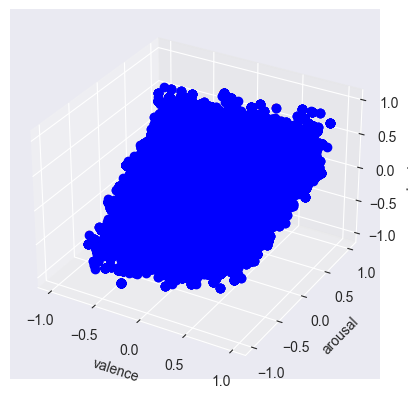

In [20]:
# Extract the x, y, and z components from the vectors array
valence = normalized_np_vectors[:, 0]
arousal = normalized_np_vectors[:, 1]
dominance = normalized_np_vectors[:, 2]
# print(np.max(normalized_np_vectors[:, 0])


# Plot the vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(valence, arousal, dominance, 'bo')
ax.scatter(valence, arousal, dominance, color='r')

# Set labels for each axis
ax.set_xlabel('valence')
ax.set_ylabel('arousal')
ax.set_zlabel('dominance')

# Show the plot
plt.show()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

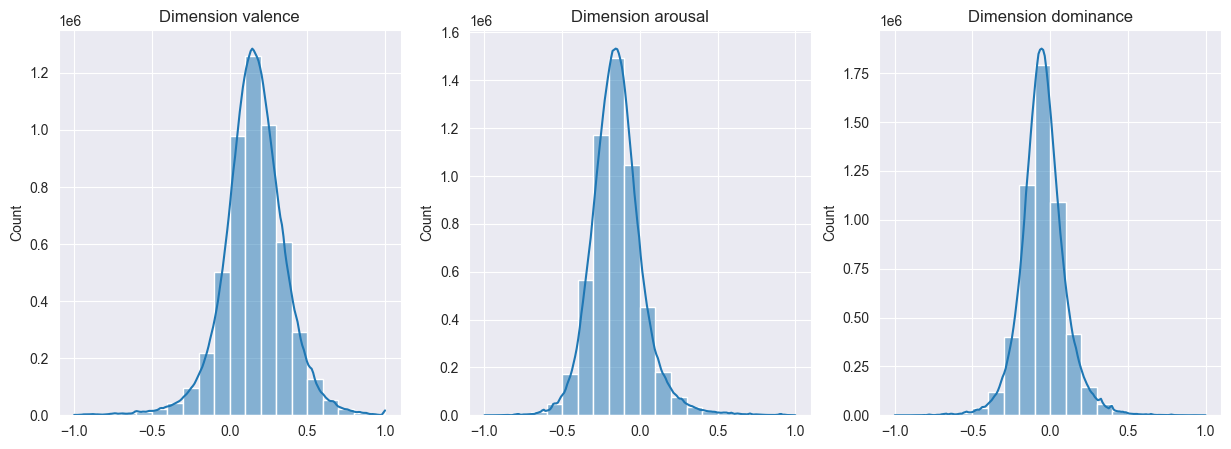

In [22]:
# Plot histograms
plt.figure(figsize=(15,5))
dims = ['valence', 'arousal', 'dominance']
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.histplot(normalized_np_vectors[:, i], bins=20, kde=True)
    plt.title(f'Dimension {dims[i]}')

In [23]:
def categorize(values):
    # Calculate thresholds
    threshold1, threshold2 = np.percentile(values, [33, 66])
    print(threshold1)
    print(threshold2)
    # return threshold1, threshold2
    # Initialize an empty list to hold the categories
    categories = []

    # Iterate over the values
    for value in values:
        # Determine the category and append it to the list
        if value < threshold1:
            categories.append('Low')
        elif value < threshold2:
            categories.append('Medium')
        else:
            categories.append('High')

    return categories

In [36]:
def categorize_valence(values):
    # Calculate thresholds
    threshold1, threshold2 =  0.08711111111111114, 0.2290000000000001
    print(threshold1)
    print(threshold2)
    # return threshold1, threshold2
    # Initialize an empty list to hold the categories
    categories = []

    # Iterate over the values
    for value in values:
        # Determine the category and append it to the list
        if value < threshold1:
            categories.append('Low')
        elif value < threshold2:
            categories.append('Medium')
        else:
            categories.append('High')

    return categories

In [37]:
def categorize_arousal(values):
    # Calculate thresholds
    threshold1, threshold2 =  -0.2159632402995234, -0.0980825958702064
    print(threshold1)
    print(threshold2)
    # return threshold1, threshold2
    # Initialize an empty list to hold the categories
    categories = []

    # Iterate over the values
    for value in values:
        # Determine the category and append it to the list
        if value < threshold1:
            categories.append('Low')
        elif value < threshold2:
            categories.append('Medium')
        else:
            categories.append('High')

    return categories

In [38]:
def categorize_dominance(values):
    # Calculate thresholds
    threshold1, threshold2 =  -0.10055496828752641, -0.00359408033826647
    print(threshold1)
    print(threshold2)
    # return threshold1, threshold2
    # Initialize an empty list to hold the categories
    categories = []

    # Iterate over the values
    for value in values:
        # Determine the category and append it to the list
        if value < threshold1:
            categories.append('Low')
        elif value < threshold2:
            categories.append('Medium')
        else:
            categories.append('High')

    return categories

In [24]:
valence = normalized_np_vectors[:, 0]

arousal = normalized_np_vectors[:, 1]

dominance = normalized_np_vectors[:, 2]

In [25]:
dim1_categories = categorize(valence)
dim2_categories = categorize(arousal)
dim3_categories = categorize(dominance)

print(dim1_categories[1087987])
print(dim2_categories[103423])
print(dim3_categories[248572])

0.08711111111111114
0.2290000000000001
-0.2159632402995234
-0.0980825958702064
-0.10055496828752641
-0.00359408033826647
High
Low
High


In [26]:
prompts = pd.read_csv('/Users/zhenyabudnyk/PycharmProjects/LyrAIX/Thesis/Research Questions/RQ1/prompts.csv')


In [28]:
prompts

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Valence,Arousal,Dominance,Part,Artist,Topic,Explicitness,Scheme,Instruction,results,predicted explicitness
0,0,0,0,High,Low,Medium,Chorus,Sofya Wang,life and relationships,Normal,0-0-0-1-0-0-1-1,Generate a Chorus of song lyrics in the style ...,"We're lying, we're lying in the shadows\nI'm f...",Normal
1,1,1,1,High,Medium,Low,Bridge,Chiddy Bang,life and relationships,Normal,0-0-1-2-3-4-5-6,Generate a Bridge of song lyrics in the style ...,You don't wanna party\nWhy you tryna party\nI ...,Normal
2,2,2,2,High,Medium,High,Chorus,Shwayze,life and relationships,Normal,0-1-2-0-3-3-4,Generate a Chorus of song lyrics in the style ...,"And if you run from me, baby, run from me\nYou...",Normal
3,3,3,3,Medium,Low,High,Bridge,Dove Cameron,general,Normal,0-1-2-1-1-1,Generate a Bridge of song lyrics in the style ...,"Swing on by, all you can hear is me\nLet's get...",Normal
4,4,4,4,Medium,High,Medium,Chorus,Weezer,general,Normal,0,Generate a Chorus of song lyrics in the style ...,Singing like a symphony in a restaurant\n,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,295,295,High,High,Low,Verse,The Irish Rovers,general,Normal,0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18...,Generate a Verse of song lyrics in the style o...,Down to the wire\nI'm down to the wire\nI'm do...,Normal
296,296,296,296,High,Low,High,Verse,Genius English Translations,life and relationships,Explicit content,0-0-0-0,Generate a Verse of song lyrics in the style o...,"Well, I want to taste my eyes\nI wanna see the...",Normal
297,297,297,297,Low,High,Medium,Verse,Tiana Major9 & SiR,general,Normal,0-1-2-1,Generate a Verse of song lyrics in the style o...,"It's a big world, but I gotta do my thing\nThe...",Normal
298,298,298,298,Medium,Medium,Low,Verse,Spacey Jane,religion and society,Explicit content,0-1-2-3,Generate a Verse of song lyrics in the style o...,Him to me a mwah a cryd for the people that kn...,Normal


In [30]:
affects = prompts['results'].progress_apply(compute_affect)

100%|██████████| 300/300 [00:00<00:00, 2379.59it/s]


In [31]:
print(affects)

0      [0.2009090909090909, 0.06545454545454545, -0.0...
1      [0.28350000000000003, -0.061749999999999985, -...
2      [0.32349999999999995, 0.08399999999999996, 0.0...
3                [0.22304, 0.05144000000000002, 0.05272]
4      [0.608, -0.07849999999999999, 0.03700000000000...
                             ...                        
295    [-0.31199999999999994, -0.3399999999999999, -0...
296    [0.3170769230769231, -0.0456923076923077, -0.1...
297    [0.40586666666666665, -0.06546666666666666, 0....
298    [0.08930434782608697, -0.14486956521739125, 0....
299    [0.25039999999999996, -0.19533333333333333, -0...
Name: results, Length: 300, dtype: object


In [34]:
processed_vectors = []
for vector in affects:
    # Check if the vector is a valid three-dimensional array
    if isinstance(vector, np.ndarray) and vector.shape == (3,):
        processed_vectors.append(vector)

# Convert the processed vectors to a NumPy array
# vectors_array = np.array(processed_vectors)
np_affects = processed_vectors
print(np.shape(np_affects))

(300, 3)


In [41]:
print(type(np_affects))
num_nan = np.sum(np.isnan(np_affects))
print(num_nan)
np_affects = np.array(np_affects)
print(np.shape(np_affects))
# 12 out of 300 is nan

<class 'list'>
12
(300, 3)


In [60]:
min_vals = np.min(np_affects, axis=0)
max_vals = np.max(np_affects, axis=0)

# Reshape min_vals and max_vals to have the same shape as np_vectors
min_vals = min_vals.reshape(1, -1)
max_vals = max_vals.reshape(1, -1)

# Compute the range for each dimension
ranges = max_vals - min_vals

In [70]:
normalized_affects = (np_affects - min_vals) / ranges
normalized_np_affects = (normalized_affects * 2) - 1

In [71]:
valence = normalized_np_affects[:, 0]

arousal = normalized_np_affects[:, 1]

dominance = normalized_np_affects[:, 2]


In [72]:
dim1_categories = categorize_valence(valence)
dim2_categories = categorize_arousal(arousal)
dim3_categories = categorize_dominance(dominance)


0.08711111111111114
0.2290000000000001
-0.2159632402995234
-0.0980825958702064
-0.10055496828752641
-0.00359408033826647


In [73]:
prompts['predicted valence'] = dim1_categories
prompts['predicted arousal'] = dim2_categories
prompts['predicted dominance'] = dim3_categories


In [74]:
prompts

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Valence,Arousal,Dominance,Part,Artist,Topic,Explicitness,Scheme,Instruction,results,predicted explicitness,predicted valence,predicted arousal,predicted dominance
0,0,0,0,High,Low,Medium,Chorus,Sofya Wang,life and relationships,Normal,0-0-0-1-0-0-1-1,Generate a Chorus of song lyrics in the style ...,"We're lying, we're lying in the shadows\nI'm f...",Normal,Medium,High,Medium
1,1,1,1,High,Medium,Low,Bridge,Chiddy Bang,life and relationships,Normal,0-0-1-2-3-4-5-6,Generate a Bridge of song lyrics in the style ...,You don't wanna party\nWhy you tryna party\nI ...,Normal,High,Medium,Low
2,2,2,2,High,Medium,High,Chorus,Shwayze,life and relationships,Normal,0-1-2-0-3-3-4,Generate a Chorus of song lyrics in the style ...,"And if you run from me, baby, run from me\nYou...",Normal,High,High,High
3,3,3,3,Medium,Low,High,Bridge,Dove Cameron,general,Normal,0-1-2-1-1-1,Generate a Bridge of song lyrics in the style ...,"Swing on by, all you can hear is me\nLet's get...",Normal,Medium,High,High
4,4,4,4,Medium,High,Medium,Chorus,Weezer,general,Normal,0,Generate a Chorus of song lyrics in the style ...,Singing like a symphony in a restaurant\n,Normal,High,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,295,295,High,High,Low,Verse,The Irish Rovers,general,Normal,0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18...,Generate a Verse of song lyrics in the style o...,Down to the wire\nI'm down to the wire\nI'm do...,Normal,Low,Low,Low
296,296,296,296,High,Low,High,Verse,Genius English Translations,life and relationships,Explicit content,0-0-0-0,Generate a Verse of song lyrics in the style o...,"Well, I want to taste my eyes\nI wanna see the...",Normal,High,High,Low
297,297,297,297,Low,High,Medium,Verse,Tiana Major9 & SiR,general,Normal,0-1-2-1,Generate a Verse of song lyrics in the style o...,"It's a big world, but I gotta do my thing\nThe...",Normal,High,Medium,High
298,298,298,298,Medium,Medium,Low,Verse,Spacey Jane,religion and society,Explicit content,0-1-2-3,Generate a Verse of song lyrics in the style o...,Him to me a mwah a cryd for the people that kn...,Normal,Medium,Medium,Medium


In [89]:
match = 0
for i in range(300):
    if prompts.loc[i, 'Valence'] == prompts.loc[i, 'predicted valence']:
        match += 1
print(match)
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming your DataFrame is called 'df' with columns 'ground_truth' and 'predicted'
ground_truth = prompts['Valence']
predicted = prompts['predicted valence']

class_labels = ['Low', 'Medium', 'High']  # Replace with your actual class labels

# Create the confusion matrix
cm = confusion_matrix(ground_truth, predicted, labels=class_labels)
# Create the confusion matrix
accuracy = accuracy_score(ground_truth, predicted)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)


print(cm)


96
Confusion Matrix:
[[25 31 42]
 [31 24 38]
 [39 23 47]]
Accuracy: 0.32
[[25 31 42]
 [31 24 38]
 [39 23 47]]


In [90]:
match = 0
for i in range(300):
    if prompts.loc[i, 'Arousal'] == prompts.loc[i, 'predicted arousal']:
        match += 1
print(match)
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame is called 'df' with columns 'ground_truth' and 'predicted'
ground_truth = prompts['Arousal']
predicted = prompts['predicted arousal']

class_labels = ['Low', 'Medium', 'High']  # Replace with your actual class labels

# Create the confusion matrix
cm = confusion_matrix(ground_truth, predicted, labels=class_labels)
accuracy = accuracy_score(ground_truth, predicted)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
# Create the confusion matrix


print(cm)

115
Confusion Matrix:
[[54 30 24]
 [43 28 29]
 [40 19 33]]
Accuracy: 0.38333333333333336
[[54 30 24]
 [43 28 29]
 [40 19 33]]


In [88]:
match = 0
for i in range(300):
    if prompts.loc[i, 'Dominance'] == prompts.loc[i, 'predicted dominance']:
        match += 1
print(match)
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming your DataFrame is called 'df' with columns 'ground_truth' and 'predicted'
ground_truth = prompts['Dominance']
predicted = prompts['predicted dominance']

class_labels = ['Low', 'Medium', 'High']  # Replace with your actual class labels

# Create the confusion matrix
cm = confusion_matrix(ground_truth, predicted, labels=class_labels)
# Create the confusion matrix
accuracy = accuracy_score(ground_truth, predicted)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

print(cm)

132
Confusion Matrix:
[[48 21 35]
 [34 28 35]
 [21 22 56]]
Accuracy: 0.44
[[48 21 35]
 [34 28 35]
 [21 22 56]]


In [146]:
lyrics.to_csv('LYRICS_FINAL.csv')

In [149]:
topics_lyrics = pd.read_csv('song_topics.csv')

In [151]:
topics_lyrics.drop(indices_list, inplace=True)

In [153]:
topics_lyrics.reset_index(drop=True, inplace=True)


In [154]:
topics_lyrics

,artist,title,tag,year,views,part,lyrics,explicitness,"tokenized, lemmatized, no bad words",topic,topic vectors
0,JAY-Z,Can I Live,rap,1996,468624,[Verse 1],While I'm watchin' every nigga watchin' me clo...,Explicit content,"['watchin', 'every', 'watchin', 'closely', 'bu...",general,"[(0, 0.019203642), (1, 0.02010541), (2, 0.3112..."
1,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Ge-ge-geyeahhh\nCan I live?\nCan I live?,Normal,"['geyeahhh', 'live', 'live']",life and relationships,"[(0, 0.050868712), (1, 0.025604054), (2, 0.593..."
2,JAY-Z,Can I Live,rap,1996,468624,[Verse 2],My mind is infested with sick thoughts that ci...,Normal,"['mind', 'infested', 'sick', 'thought', 'circl...",general,"[(0, 0.028946271), (2, 0.28977466), (3, 0.0516..."
3,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Can I live?\nCan I live?\nCan I live?\nCan I l...,Normal,"['live', 'live', 'live', 'live']",life and relationships,"[(0, 0.04173949), (1, 0.021008987), (2, 0.6667..."
4,Fabolous,Forgive Me Father,rap,2003,4743,[Hook],Forgive me father for I have sinned\nBut look ...,Explicit content,"['forgive', 'father', 'sinned', 'look', 'money...",life and relationships,"[(0, 0.01798938), (2, 0.55931425), (3, 0.05453..."
...,...,...,...,...,...,...,...,...,...,...,...
5285446,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,"['one', 'dial', 'least', 'couple', 'thousand',...",money and authority,"[(0, 0.1113326), (1, 0.010574765), (2, 0.59507..."
5285447,Alana Springsteen,New Number,country,2022,1,[Verse 2],You need a new number and you can't get it fas...,Normal,"['need', 'new', 'number', 'fast', 'enough', 'c...",money and authority,"[(0, 0.10296713), (2, 0.7100746), (3, 0.018717..."
5285448,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,"['one', 'dial', 'least', 'couple', 'thousand',...",money and authority,"[(0, 0.098045945), (2, 0.6052145), (3, 0.01632..."
5285449,Alana Springsteen,New Number,country,2022,1,[Bridge],"Oh, if you wanna help me out\nIf you wanna let...",Normal,"['wanna', 'help', 'wanna', 'let', 'easy', 'car...",money and authority,"[(0, 0.18100938), (1, 0.012229693), (2, 0.6424..."


In [155]:
topics = topics_lyrics["topic"].values.tolist()

In [156]:
lyrics['topic'] = topics

In [157]:
lyrics

,artist,title,tag,year,views,part,lyrics,explicitness,"tokenized, lemmatized, no bad words",predicted_topics,topic vectors,schemes,affect majority score,Valence,Arousal,Dominance,topic
0,JAY-Z,Can I Live,rap,1996,468624,[Verse 1],While I'm watchin' every nigga watchin' me clo...,Explicit content,"['watchin', 'every', 'watchin', 'closely', 'bu...",wealth and authority,"[(0, 0.113372415), (1, 0.39564058), (2, 0.0583...",0-0-0-0-1-1-0-2-0-3-4-5-0-6-7-8-7-9-7-5-5-10-1...,"[0.15460162601626018, -0.05027642276422763, 0....",Medium,Medium,Medium,general
1,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Ge-ge-geyeahhh\nCan I live?\nCan I live?,Normal,"['geyeahhh', 'live', 'live']",violence,"[(0, 0.05250941), (1, 0.1470429), (2, 0.052438...",0-1-2,"[0.542, 0.032999999999999974, 0.13]",High,High,High,life and relationships
2,JAY-Z,Can I Live,rap,1996,468624,[Verse 2],My mind is infested with sick thoughts that ci...,Normal,"['mind', 'infested', 'sick', 'thought', 'circl...",wealth and authority,"[(0, 0.10937761), (1, 0.3868071), (2, 0.050701...",0-1-1-1-2-3-4-5-5-6-6-1-1-1-7-7-8,"[0.11377142857142858, -0.06905714285714284, 0....",Medium,Medium,High,general
3,JAY-Z,Can I Live,rap,1996,468624,[Chorus],Can I live?\nCan I live?\nCan I live?\nCan I l...,Normal,"['live', 'live', 'live', 'live']",violence,"[(0, 0.044248056), (1, 0.12390851), (2, 0.0441...",0-1-2-3,"[0.5419999999999999, 0.032999999999999974, 0.13]",High,High,High,life and relationships
4,Fabolous,Forgive Me Father,rap,2003,4743,[Hook],Forgive me father for I have sinned\nBut look ...,Explicit content,"['forgive', 'father', 'sinned', 'look', 'money...",violence,"[(0, 0.05578675), (1, 0.19629966), (2, 0.09306...",0-0-0-0-1-0-0-0,"[0.2957894736842104, -0.10726315789473684, 0.0...",High,Medium,High,life and relationships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285446,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,"['one', 'dial', 'least', 'couple', 'thousand',...",violence,"[(0, 0.02372636), (1, 0.1153468), (2, 0.023694...",0-1-0-2-3,"[0.21057142857142855, -0.2071428571428571, -0....",Medium,Low,Low,money and authority
5285447,Alana Springsteen,New Number,country,2022,1,[Verse 2],You need a new number and you can't get it fas...,Normal,"['need', 'new', 'number', 'fast', 'enough', 'c...",home and nature,"[(0, 0.17068717), (1, 0.13369475), (2, 0.02103...",0-0-1-2,"[0.3163076923076923, -0.09276923076923077, 0.0...",High,Medium,Medium,money and authority
5285448,Alana Springsteen,New Number,country,2022,1,[Chorus],One that I ain't dial at least a couple thousa...,Normal,"['one', 'dial', 'least', 'couple', 'thousand',...",violence,"[(0, 0.021061467), (1, 0.15476061), (2, 0.0210...",0-1-0-2-3-2-4-5,"[0.2125882352941176, -0.19470588235294115, -0....",Medium,Low,Low,money and authority
5285449,Alana Springsteen,New Number,country,2022,1,[Bridge],"Oh, if you wanna help me out\nIf you wanna let...",Normal,"['wanna', 'help', 'wanna', 'let', 'easy', 'car...",home and nature,"[(0, 0.027157595), (1, 0.07908834), (2, 0.0271...",0-1-2-3-3-2,"[0.042666666666666665, -0.2306666666666667, -0...",Low,Low,Low,money and authority


In [158]:
lyrics = lyrics.drop(['topic vectors', 'affect majority score', 'tokenized, lemmatized, no bad words'], axis=1)
# or with inplace=True



In [160]:
lyrics.to_csv('song_lyrics_affected.csv')

## should the data be normalized with the general poplulation values, or with the sample minimum and range?